### Project Notes

* Airlines are in trouble and customers are "up for grabs". 

* any negative values in Arrival Delay (plane early?)
* drop more outliers for Departure Delay?
* check distributions of travel type, gender, class
* do I want to bin age group data?
* log transform?

* Bias in dataset? more likely to take survey if satisfied/dissatisfied?

    * Do I have an imbalanced data set? ---SLIGHTLY
        * Accuracy versus recall/precision

* Precision or recall?
    * care more about getting dissatisfied customers correct?
    * more expensive to lose a customers
    * customer churn/dissatisfaction
    * how much to lose a customer? 
    * lifetime value of an airline customer
    * Create a business case for losing customer/risk

    * be sure to collect highest number of actually dissastisfied
        * precision: capturing dissatisfied, maximize actually dissatisfied (more scrutinous)
        * recall: make call happy passengers, grab as many dissatisfieds, even if some aren't dissatisfied (don't care about false positive)

    * May just want a model that performs well over threshold

* Will eventually use ROC curve to compare algorithms (make decisions one level removed from model through graph)

In [389]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from scipy.spatial.distance import euclidean as euc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from visualize import generate_moons_df, preprocess, plot_boundaries


In [390]:
#adding CSVs and concatting dataframes
df_kaggle1 = pd.read_csv("/Users/Tara8082/GIT/ProjectGIT/Project_3/train.csv", index_col = 'Unnamed: 0')
df_kaggle2 = pd.read_csv("/Users/Tara8082/GIT/ProjectGIT/Project_3/test.csv",  index_col = 'Unnamed: 0')
frames = [df_kaggle1, df_kaggle2]
df = pd.concat(frames)

In [391]:
# NEED TO PUT INTO SQL DATABASE (IMPORT TO DATABASE, USE SQL TO PUT INTO DF

In [392]:
df.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [393]:
# check for null values and drop 'Arrival Delay in Minutes' null values

df.isnull().sum()
df = df.dropna(subset = ['Arrival Delay in Minutes'])    

In [394]:
#129,487 customer record rows
#24 total columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     12948

In [395]:
df['Departure Delay in Minutes'].describe()

count    129487.000000
mean         14.643385
std          37.932867
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [396]:
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [397]:
delay_std = round(np.std(df['Departure Delay in Minutes']), 2)
delay_mean = round(df['Departure Delay in Minutes'].mean(), 2)
print('STD departure delay (minutes):', + delay_std)
print('Mean departure delay (minutes):', + delay_mean)

STD departure delay (minutes): 37.93
Mean departure delay (minutes): 14.64


## Should I remove outliers for Departure Delay in Minutes?

In [398]:
import numpy as np
import matplotlib.pyplot as plt
# seed(1)

# multiply and add by random numbers to get some real values
data = df['Departure Delay in Minutes']

#define list to accumulate anomalies
anomalies = []
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit, ": lower limit")
    print(upper_limit, ": upper limit")
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    print(len(anomalies), 'is the number of outliers.')
    return anomalies

find_anomalies(data)

-99.1547751767204 : lower limit
128.44154527719382 : upper limit
2716 is the number of outliers.


[162,
 141,
 209,
 149,
 176,
 199,
 141,
 172,
 175,
 143,
 220,
 141,
 232,
 170,
 173,
 243,
 270,
 144,
 315,
 158,
 156,
 154,
 150,
 228,
 137,
 161,
 174,
 137,
 313,
 136,
 160,
 232,
 149,
 412,
 185,
 199,
 135,
 142,
 147,
 235,
 391,
 138,
 196,
 140,
 187,
 131,
 170,
 165,
 129,
 204,
 435,
 166,
 177,
 139,
 129,
 228,
 167,
 285,
 190,
 168,
 211,
 324,
 154,
 156,
 202,
 290,
 189,
 203,
 157,
 142,
 165,
 299,
 292,
 258,
 135,
 222,
 317,
 161,
 176,
 135,
 320,
 200,
 134,
 248,
 158,
 240,
 154,
 156,
 169,
 138,
 249,
 145,
 238,
 246,
 139,
 132,
 180,
 235,
 136,
 173,
 165,
 151,
 480,
 241,
 157,
 170,
 130,
 132,
 268,
 144,
 133,
 172,
 171,
 190,
 164,
 135,
 330,
 438,
 147,
 149,
 472,
 149,
 189,
 163,
 166,
 176,
 134,
 326,
 186,
 173,
 150,
 241,
 136,
 157,
 176,
 164,
 235,
 155,
 131,
 155,
 158,
 189,
 170,
 223,
 163,
 180,
 332,
 200,
 133,
 447,
 1305,
 145,
 208,
 201,
 233,
 210,
 129,
 182,
 138,
 144,
 154,
 221,
 159,
 241,
 157,
 188,
 17

In [399]:
df = df[df['Departure Delay in Minutes'] <= 1000] 

In [400]:
#remove passengers under 12?

#df = df[df['Age'] >= 12]

In [401]:
df.shape

(129483, 24)

In [440]:
df.loc[(df['Customer Type'] == 'Loyal Customer'),'Customer Type']= str('Loyal')
df.loc[(df['Customer Type'] == 'disloyal Customer'),'Customer Type']= str('Disloyal')

## Exploratory Data Analysis

In [402]:
# Balance of dataset

# imbalance = a random oversampler (of minority class)
# should I cut some majority?

balance = df['satisfaction'].value_counts('neutral or dissatisfied')
balance

neutral or dissatisfied    0.565503
satisfied                  0.434497
Name: satisfaction, dtype: float64

### Correlations

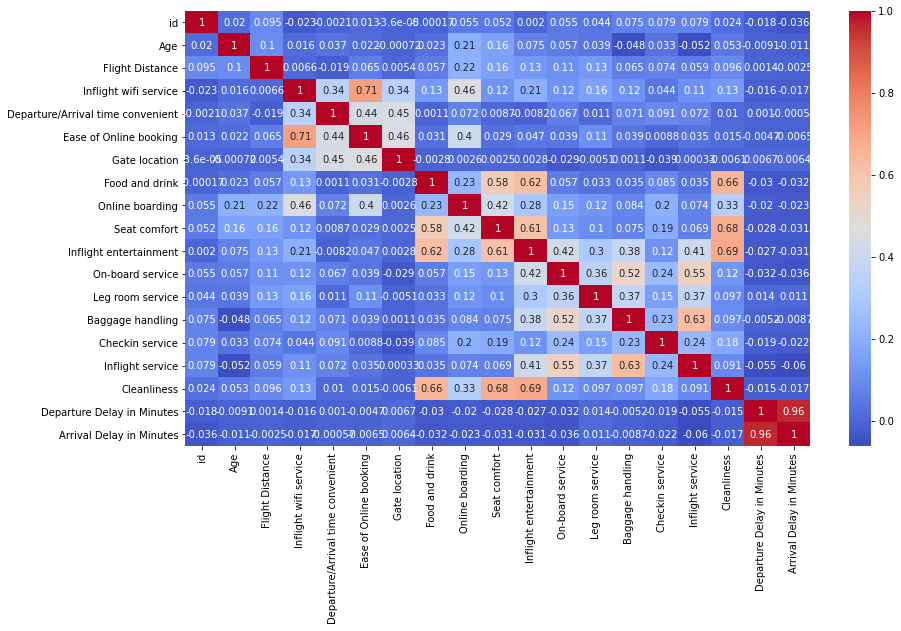

In [403]:
# drop arrival delay in minutes
# some may be highly correlated (high score) but not worth dropping yet until see how model performs

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap= 'coolwarm', annot=True);

In [404]:
# drop as arrival and departure delay are co-linear

df = df.drop(['Arrival Delay in Minutes'], axis =1 )


### Distributions --- need to fix and finish

Text(0, 0.5, 'Customers')

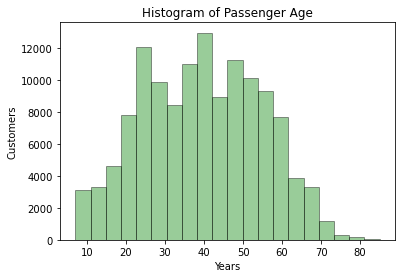

In [405]:
# Passenger Age Distribution
sns.distplot(df['Age'], hist=True, kde=False, 
             bins=int(100/5), color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Passenger Age')
plt.xlabel('Years')
plt.ylabel('Customers')

In [409]:
df['Gender'].value_counts()

Female    65702
Male      63781
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Side-by-Side Histogram with Genders')

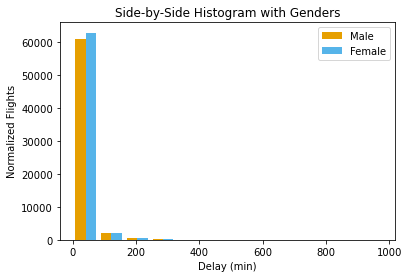

In [410]:
# Make a separate list for each gender
x1 = list(df[df['Gender'] == 'Male']['Departure Delay in Minutes'])
x2 = list(df[df['Gender'] == 'Female']['Departure Delay in Minutes'])


# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['Male', 'Female']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2], bins = int(180/15), #normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Genders')

Text(0.5, 1.0, 'Side-by-Side Histogram with Class Types')

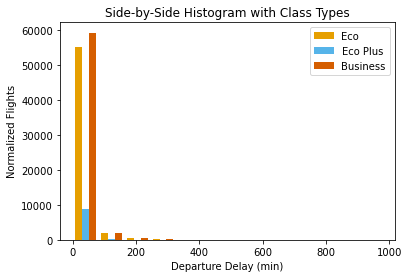

In [411]:
#Eco, Eco Plus, Business Class Hisotgram by Departure Delay in Minutes

# Make a separate list for each Class
x1 = list(df[df['Class'] == 'Eco']['Departure Delay in Minutes'])
x2 = list(df[df['Class'] == 'Eco Plus']['Departure Delay in Minutes'])
x3 = list(df[df['Class'] == 'Business']['Departure Delay in Minutes'])


# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#D55E00']
names = ['Eco', 'Eco Plus', 'Business']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3], bins = int(180/15), #normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Departure Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Class Types')

In [412]:
df['Class'].value_counts()

Business    61988
Eco         58115
Eco Plus     9380
Name: Class, dtype: int64

Text(0.5, 1.0, 'Side-by-Side Histogram with Genders')

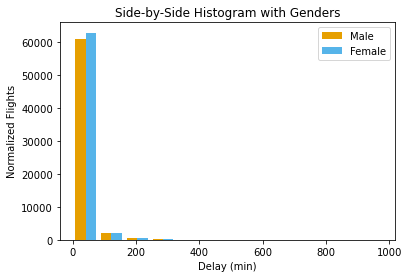

In [413]:
# Make a separate list for each gender
x1 = list(df[df['Gender'] == 'Male']['Departure Delay in Minutes'])
x2 = list(df[df['Gender'] == 'Female']['Departure Delay in Minutes'])


# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['Male', 'Female']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2], bins = int(180/15), #normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Genders')

Text(0, 0.5, 'Flights')

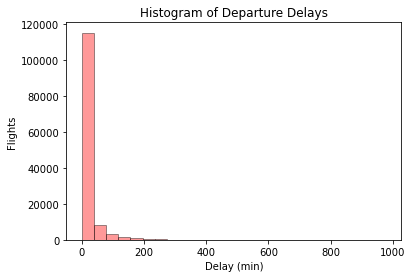

In [414]:
# Departure Delay Distribution
sns.distplot(df['Departure Delay in Minutes'], hist=True, kde=False, 
             bins=int(250/10), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Departure Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [417]:
df['Customer Type'].value_counts()

Loyal Customer       105769
disloyal Customer     23714
Name: Customer Type, dtype: int64

In [442]:
# Make a separate list for each gender
x1 = list(df[df['Customer Type'] == 'Loyal']['Departure Delay in Minutes'])
x2 = list(df[df['Customer Type'] == 'Disloyal']['Departure Delay in Minutes'])


# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']
names = ['Loyal Customer', 'Disloyal Customer']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2], bins = int(250,10), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Loyal v Disloyal Customers')

TypeError: int() can't convert non-string with explicit base

## Modeling

In [415]:
df_model = df.copy()

In [416]:
df_model.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied


In [426]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes']

X = df_model[features]
y = df_model['satisfaction']



In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=6)

In [430]:
#specify categorical features

categoricals = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
non_cat = ['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes']

ohe = OneHotEncoder(sparse=False)

cat_matrix_train = ohe.fit_transform(X_train.loc[:, categoricals])

X_train_ohe = pd.DataFrame(cat_matrix_train,
                           columns=ohe.get_feature_names(categoricals), #create meaningful column names
                           index=X_train.index) #keep the same index values

#combine continuous and categorical data

X_train_preprocessed = pd.concat([X_train[non_cat], X_train_ohe], axis=1)

#Scale data
ss = StandardScaler()
X_train_preprocessed = ss.fit_transform(X_train_preprocessed)

X_train_preprocessed

array([[-1.09262164,  1.70892797, -1.34943829, ..., -0.95633531,
         1.10463279, -0.27833745],
       [ 0.66858014, -0.54790272, -1.34943829, ..., -0.95633531,
         1.10463279, -0.27833745],
       [-0.43053837, -0.54790272, -0.69441228, ...,  1.04565835,
        -0.90527822, -0.27833745],
       ...,
       [-0.47072552, -2.05245652,  1.27066578, ...,  1.04565835,
        -0.90527822, -0.27833745],
       [-0.17032658, -0.54790272, -1.34943829, ..., -0.95633531,
         1.10463279, -0.27833745],
       [-0.57018871, -0.54790272, -0.03938626, ..., -0.95633531,
         1.10463279, -0.27833745]])

In [431]:
# Create validation set with X_train_preprocessed data

X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_preprocessed, y_train, test_size=.3, random_state=2)

In [432]:
#transform and scale testing set --- DON'T TOUCH TEST UNTIL END.

cat_matrix_test = ohe.transform(X_test.loc[:, categoricals]) #only transform on the test set!

X_test_ohe = pd.DataFrame(cat_matrix_test,
                           columns=ohe.get_feature_names(categoricals), #create meaningful column names
                           index=X_test.index) #keep the same index values

X_test_preprocessed = pd.concat([X_test[non_cat], X_test_ohe], axis=1)

#Scale test data
X_test_preprocessed = ss.transform(X_test_preprocessed)

In [434]:
# Logistic Regression Model on Train/Val data

lr = LogisticRegression(penalty='none')

lr.fit(X_train_scaled, y_train)

y_val_preds = lr.predict(X_val_scaled)

#test_preds = lr.predict(X_test_preprocessed) #DON'T RUN

print(classification_report(y_val, y_val_preds))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.89     15412
              satisfied       0.87      0.83      0.85     11780

               accuracy                           0.87     27192
              macro avg       0.87      0.87      0.87     27192
           weighted avg       0.87      0.87      0.87     27192



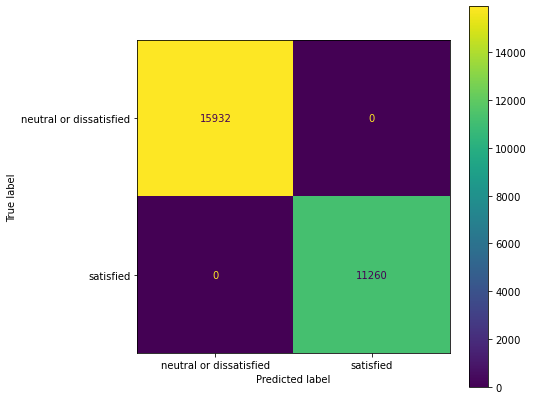

In [436]:
# Confusion Matrix

fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(lr, X_val_scaled, y_val_preds, ax=ax);

#### KNN

In [454]:
ks = range(16, 18) #range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i,k in enumerate(ks):
    
    nn = KNeighborsClassifier(n_neighbors = k)

    nn.fit(X_train_scaled, y_train)
    y_val_preds = nn.predict(X_val_scaled)    #y_val_preds
    
    test_errors[i] = np.sqrt(mean_squared_error(y_val, y_val_preds))
    #print(k, test_errors[i])

ValueError: could not convert string to float: 'satisfied'

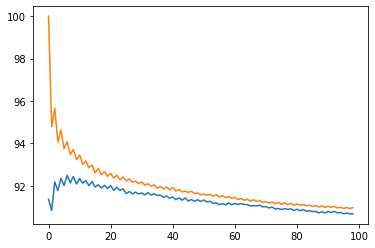

In [444]:
#looping through 100 ks, 
test_scores = []
train_scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = 100*knn.score(X_train_scaled, y_train)
    test_score = 100*knn.score(X_val_scaled, y_val)
    test_scores.append(test_score)
    train_scores.append(train_score)

plt.plot(test_scores)
plt.plot(train_scores)